<a href="https://colab.research.google.com/github/IrisFDTD/DSF-UNIZAR/blob/main/dsf_propuesta-3_spp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Photonic devices and systems - Dispersion relation of Surface Plasmon Polaritons**

---

This Jupyter notebook enables the characterization of the optical properties of Surface Plasmon Polaritons (SPPs) for any metal whose dielectric constant has been previously fitted to a Drude-Lorentz model. It provides an easy calculation of the SPP wavelength, skin depth, and propagation constant.


# SPP definitions ($\varepsilon_{silver}$, $k_{spp}$, $\lambda_{spp}$, skin-depth and propagation length)

In [56]:
'''
Optical properties of SPPs at the metal/dielectric interface
'''
import numpy as np

flw = 1239.8283  # Conversion from nm to eV and vice versa

def kspp(omega,eps_cover,eps_metal):
    '''
    SPP wavevector
    omega in eV
    '''
    return (2 * np.pi)*omega/ flw * np.sqrt((eps_cover * eps_metal(omega)) / (eps_cover + eps_metal(omega)))

def wavelength_spp(kspp):
    # SPP wavelength
    return (2 * np.pi) / np.real(kspp)

def wavelength_spp(ksp):
    # SPP wavelength
    return (2 * np.pi) / np.real(ksp)

def skin_depth(eps_metal, ko, kspp):
    # SPP skin depth
    return 1 / np.abs(np.imag(np.sqrt(eps_metal * ko**2 - kspp**2)))

def propagation_length(kspp):
    # SPP propagation length
    return 1 / (2 * np.abs(np.imag(kspp)))

# Optical properties of silver

In [57]:
'''
Definition of metal and substrate dielectric constants
'''
def epsilon_ag(omega):
    '''
    Drude-Lorentz dielectric function for Silver
    omega in eV
    '''
    epsilon_r = 4.1
    omega_p = 9.5  # eV
    gamma = 0.025  # eV
    lambda_epsilon = 1.0
    capital_omega = 5.5  # eV
    capital_gamma = 0.8  # eV
    return (epsilon_r - omega_p**2 / (omega * (omega + 1j * gamma)) -
            lambda_epsilon * capital_omega**2 / (omega**2 - capital_omega**2 + 1j * omega * capital_gamma))

eps_cover = 1.0  # Dielectric constant of dielectic in contact with metal

# Wavelength range

In [58]:
lambda0=400.0;lambdaf=2000.0;Nlambda=500 # wavelength in nm
wlength=np.linspace(lambda0,lambdaf,Nlambda)
omega=flw/wlength # omega in eV

# Plotting the dielectric constant of silver

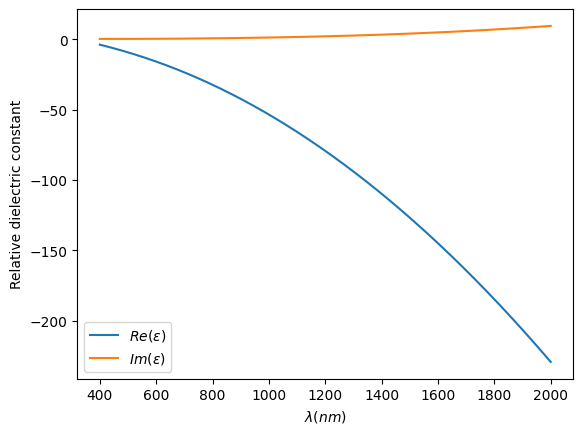

In [59]:
import matplotlib.pyplot as plt
# Values
eps_metal=epsilon_ag(omega)
re_eps=np.real(eps_metal)
im_eps=np.imag(eps_metal)

# Plotting
plt.plot(wlength,re_eps,label=r'$Re(\varepsilon)$')
plt.plot(wlength,im_eps,label=r'$Im(\varepsilon)$')
plt.xlabel(r'$\lambda (nm)$')
plt.ylabel("Relative dielectric constant")
plt.legend()
plt.show()

# Surface Plasmon dispersion relation ($k_{spp}$)

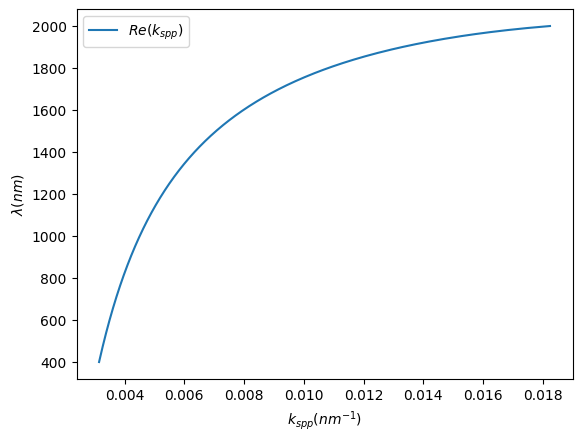

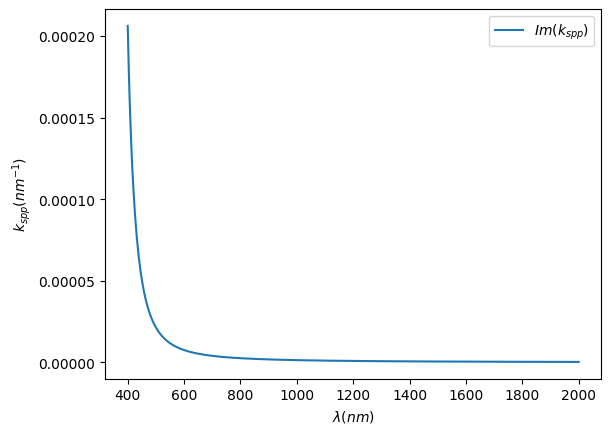

In [60]:
# Values
kspp_=kspp(omega,eps_cover,epsilon_ag)
re_kspp=np.real(kspp_)
im_kspp=np.imag(kspp_)

# Plotting Re(kspp)
plt.plot(re_kspp,wlength[::-1],label=r'$Re(k_{spp})$')
plt.xlabel(r'$k_{spp}(nm^{-1})$')
plt.ylabel(r'$\lambda (nm)$')
plt.legend()
plt.show()

# Plotting Im(kspp)
plt.plot(wlength,im_kspp,label=r'$Im(k_{spp})$')
plt.ylabel(r'$k_{spp}(nm^{-1})$')
plt.xlabel(r'$\lambda (nm)$')
plt.legend()
plt.show()

# SPP skin depth ($\delta_{spp}$)

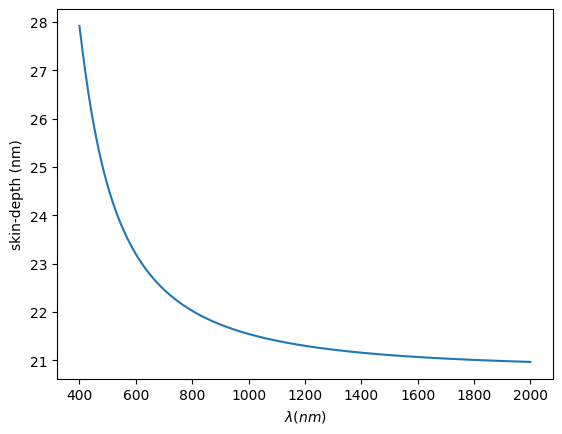

In [61]:
# Values
k0=2.0*np.pi/wlength
skin_depth_=skin_depth(eps_metal,k0,kspp_)

# Plotting skin-depth
plt.plot(wlength,skin_depth_)
plt.xlabel(r'$\lambda (nm)$')
plt.ylabel('skin-depth (nm)')
plt.show()

# SPP propagation length ($L_{spp}$)

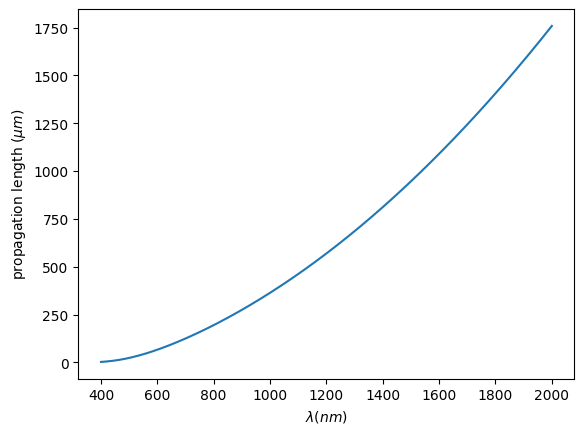

In [62]:
# Values
l_spp=propagation_length(kspp_)

# Plotting skin-depth
plt.plot(wlength,l_spp/1000.0)
plt.xlabel(r'$\lambda (nm)$')
plt.ylabel('propagation length $(\mu m)$')
plt.show()